# Lab1
## Kieran Cosgrove

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Question 1

Model linear regression between angle (radians) and voltages (volts); get fit variables

In [2]:
angles = np.array([-1.57, -1.26, -0.94, -0.63, -0.31, 0., 0.31, 0.65, 0.96, 1.23, 1.52]).reshape((-1, 1))
voltages = np.array([1.176, 1.648, 1.874, 2.175, 2.438, 2.503, 2.925, 3.067, 3.450, 3.686, 4.014]).reshape(-1, 1)

fit = LinearRegression().fit(voltages, angles)
r_squared = fit.score(voltages, angles)

print("Rsquared: {0} (%)\nSlope: {1} (V/rad)\nIntercept: {2} (rad)".format(r_squared, fit.coef_, fit.intercept_))

Rsquared: 0.9906097430823074 (%)
Slope: [[1.15858052]] (V/rad)
Intercept: [-3.05344161] (rad)


Plot fit

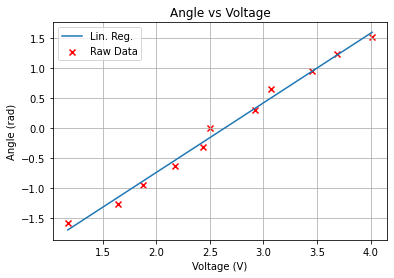

In [3]:
plt.scatter(voltages,angles, c="r", marker='x')
plt.plot(voltages,fit.coef_*voltages + fit.intercept_)
plt.xlabel('Voltage (V)')
plt.ylabel('Angle (rad)')
plt.legend(['Lin. Reg.','Raw Data'])
plt.title('Angle vs Voltage')
plt.grid()

### Question 2

Initial data & conversion; plot data

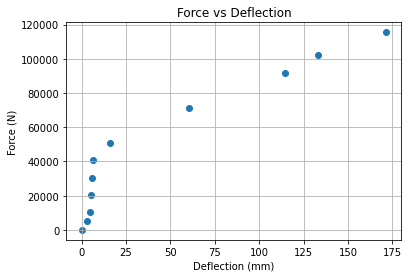

In [4]:
Mass     = np.array([0,50,100,200,300,400,500,700,900,1000,1133]).reshape(-1, 1) # [g]
L_bungee = np.array([8.75,8.875,8.925,8.95,8.975,9,9.375,11.125,13.25,14,15.5]).reshape(-1, 1) #[in]

L_mm = L_bungee * 25.4
Force  = Mass * 1000 / 9.81 # N
DeltaL = L_mm - L_mm[0]

plt.scatter(DeltaL, Force)
plt.title("Force vs Deflection")
plt.xlabel("Deflection (mm)")
plt.ylabel("Force (N)")
plt.grid()

Based on this graph and the Physics of Bungee Jumping article, I would suggest a piecewise solution.
The data seems to follow two linear trends put together, splitting at approximately 40000 N

Below is the fits for these two linear models

In [5]:
def filter(a_list, cutoff, above_bool):
    new_list = []
    for x in a_list:
        if above_bool and x > cutoff or not above_bool and x < cutoff:
            new_list.append(x)
    return new_list

# fit for < 40,000 N
force_1 = filter(Force, 45000, False)
defl_1 = L_mm[:len(force_1)]


fit2 = LinearRegression().fit(defl_1, force_1)
r_squared2 = fit2.score(defl_1, force_1)
print("Fit1\nRsquared: {0} (%)\nSlope: {1} (V/rad)\nIntercept: {2} (rad)".format(r_squared2, fit2.coef_, fit2.intercept_))

# fit for > 40,000 N
defl_2 = L_mm[len(force_1)-1:]
force_2 = Force[len(force_1)-1:]

fit3 = LinearRegression().fit(defl_2, force_2)
r_squared3 = fit3.score(defl_2, force_2)
print("\nFit2\nRsquared: {0} (%)\nSlope: {1} (V/rad)\nIntercept: {2} (rad)".format(r_squared3, fit3.coef_, fit3.intercept_))

Fit1
Rsquared: 0.756046605062274 (%)
Slope: [[5943.30078794]] (V/rad)
Intercept: [-1327590.63426478] (rad)

Fit2
Rsquared: 0.9922245154862659 (%)
Slope: [[439.36702536]] (V/rad)
Intercept: [-55671.86766212] (rad)


Plot fits & raw data

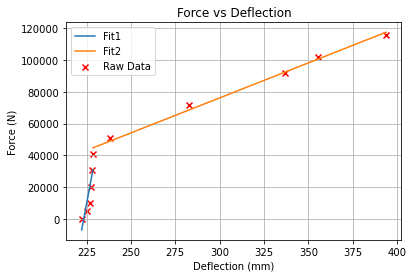

In [6]:
plt.scatter(L_mm, Force, c="r", marker='x')
plt.plot(defl_1,fit2.coef_*defl_1 + fit2.intercept_)
plt.plot(defl_2,fit3.coef_*defl_2 + fit3.intercept_)
plt.xlabel('Deflection (mm)')
plt.ylabel('Force (N)')
plt.legend(['Fit1','Fit2','Raw Data'])
plt.title('Force vs Deflection')
plt.grid()